In [64]:
from qiskit import *
from qiskit.visualization import *
import numpy as np
from qiskit.tools.monitor import job_monitor

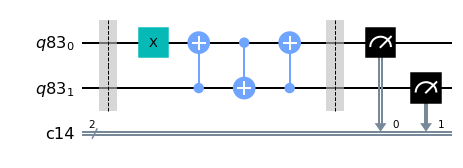

In [66]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.barrier()
qc.x(0)
qc.cx(1, 0)
qc.cx(0, 1)
qc.cx(1, 0)
qc.barrier()
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.draw()

In [60]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')

ibmqfactory.load_account:WARNING:2022-07-07 13:34:39,231: Credentials are already in use. The existing account in the session will be replaced.


In [61]:
mapped_circuit = transpile(qc, backend=backend)
qobj = assemble(mapped_circuit, backend=backend, shots=1024)

job = backend.run(qobj)
job.status()

C:\Users\nehas\AppData\Local\Temp\ipykernel_23872\1750658148.py:4: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


<JobStatus.VALIDATING: 'job is being validated'>

{'00': 39, '01': 2, '10': 954, '11': 29}


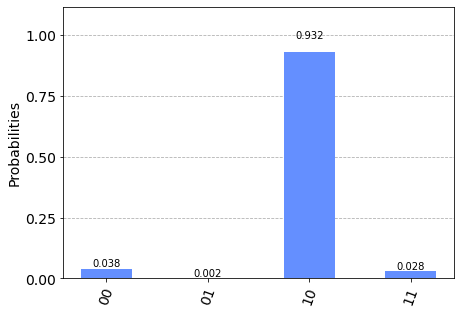

In [62]:
counts = job.result().get_counts()
print(counts)
plot_histogram(counts)